# EDA Data Cleaning

## Import Required Libraries and turn off warnings

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

## import load.csv and see the header

In [15]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Cleaning up the imported dataset

In [16]:
#see the nulls in the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [17]:
#see the null values in all the columns of dataset
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [18]:
#above output shows few column are full of NAN
#remove columns with all NAN
print("Shape of original dataset ", loan.shape)
loan.dropna(how="all", axis=1, inplace=True)
print("Shape of dataset removed with colmns with NAN ", loan.shape)

Shape of original dataset  (39717, 111)
Shape of dataset removed with colmns with NAN  (39717, 57)


In [19]:
#again check the columns with null values in modified dataset
loan_isnull_info = loan.isnull().sum()
loan_isnull_info[loan_isnull_info>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [20]:
#Before correcting Null values in the other columns, we first find the defaulter columns and make further decision on thes Null values
#first identify whether the data in the Loan_status are proper
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
#from the above result it is clear that the data in the "loan_status" column is clear and "Charged Off" is there required status for defaulter
#now we will take the subset of only the defauter, because most of the data are categorical Variant
loan_defaulter = loan[loan["loan_status"] == "Charged Off"]
loan_defaulter.shape

(5627, 57)

In [24]:
#now we will try to remove all the columns having same values

nunique = loan_defaulter.nunique()
# nunique
cols_to_drop = nunique[nunique == 1].index
cols_to_drop = cols_to_drop.drop('loan_status')
print(cols_to_drop)


Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')


In [25]:
#Drop the columns with same values
loan_defaulter.drop(cols_to_drop, axis=1, inplace=True)

In [26]:
#check the columns in the new subset and column names
print(loan_defaulter.shape)
print("Remaining Columns: ", loan_defaulter.columns)

(5627, 46)
Remaining Columns:  Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


## Data type correction

In [28]:
#Now correct the dtype of all the columns. means change the dtype object to most sutable dtype
# see the datatypes of all the columns with dtype object
# print(type(loan_defaulter.dtypes)) #[loan_defaulter.info()['Dtype'] == "object"]
obj_dtype_clm = loan_defaulter.select_dtypes(include=object).columns.tolist()
print(obj_dtype_clm)

['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [29]:
loan_defaulter[obj_dtype_clm].head()
#on seeing the below data for the columns with datatype object
#columns "int_rate", "revol_util" are need to be converted to float by removing %

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,NaN,Sep-13
8,60 months,21.28%,F,F2,NaN,4 years,OWN,Source Verified,Dec-11,Charged Off,...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,Apr-04,32.60%,Apr-12,NaN,Aug-12
9,60 months,12.69%,B,B5,Starbucks,< 1 year,RENT,Verified,Dec-11,Charged Off,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,Sep-04,36.50%,Nov-12,NaN,Mar-13
12,36 months,13.49%,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,Apr-04,91.70%,Jul-12,NaN,Nov-12
14,36 months,10.65%,B,B2,SFMTA,3 years,RENT,Source Verified,Dec-11,Charged Off,...,NaN,other,Other Loan,951xx,CA,May-91,55.50%,Oct-13,NaN,Mar-14


In [30]:
#coverting the columns "int_rate", "revol_util" to float
for each_c in ["int_rate", "revol_util"]:
    loan_defaulter[each_c] = loan_defaulter[each_c].str.replace("%", "")
    loan_defaulter[each_c] = loan_defaulter[each_c].astype(float)
#verify the datatype changed
loan_defaulter[["int_rate", "revol_util"]].dtypes

int_rate      float64
revol_util    float64
dtype: object

In [31]:
#selects all categorical columns and makes a dataframe with all value counts at once:
cat_cols = loan_defaulter.select_dtypes(include=object).columns.tolist()
value_cnt_info = (pd.DataFrame(
    loan_defaulter[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

print(type(value_cnt_info))
value_cnt_info.head()

<class 'pandas.core.frame.DataFrame'>


counts
column     value        
addr_state ID          1
           TN          2
           MS          2
           NE          3
           WY          4

In [32]:
#as we can't see the complete data in the notebook, write it to csv
value_cnt_info.to_csv("unique_value_cnt_info.csv")

In [33]:
#on seeing the csv file, the folling observation are found
# "addr_state" = 50 categories. String proper.
# "desc" = many different info can be ignored for analysis
# "earliest_cr_line" = month-date proper, can be converted to date formate
# "emp_length" = 11 categories. consistant naming for the years, this can be used as is. in case of group to bin, can be converted to integer
# "emp_title" = 37415 categories. indicate where they are working, can be string type. note: self and Self are Caps & small letters
# "grade" = 7 categories. String proper
# "sub_grade" = 35 categories. String proper
# "home_ownership" = 5 categories. String proper
# 'issue_d', 'last_credit_pull_d', 'last_pymnt_d',  = month-date proper, can be converted to date formate
# 'loan_status' = 3 categories. only 2 considered for analysis. String proper
# "purpose" = 14 Categories. String proper
# "term" =  2 category. "60 months" or  "36 months". let be as it is
# "title" = 19297 categories. string, but various category cont be used for analysis. Intermediately number are also there
# "url" = same url (https://lendingclub.com/browse/loanDetail.action?loan_id=1050340) and only difference is loan_id number at the end. using this we can get the loan_id if need
# "verification_status" = 3 category. proper string
# "zip_code" = unique 822 numbers. string with number and last 2 x. "375xx"



In [34]:
#from above checks, we can remove the columns "emp_title", "desc", "title"
loan_defaulter.shape

(5627, 46)

In [35]:
#on checking the uniqu values for each columns in "unique_value_cnt_info.csv",
# following columns are identified for the analysis
  # term, addr_state, grade, emp_length, home_ownership, verification_status, sub_grade, purpose, 
  # delinq_2yrs, inq_last_6mths, pub_rec, pub_rec_bankruptcies


# EDA Analysis
## Univariate Analysis

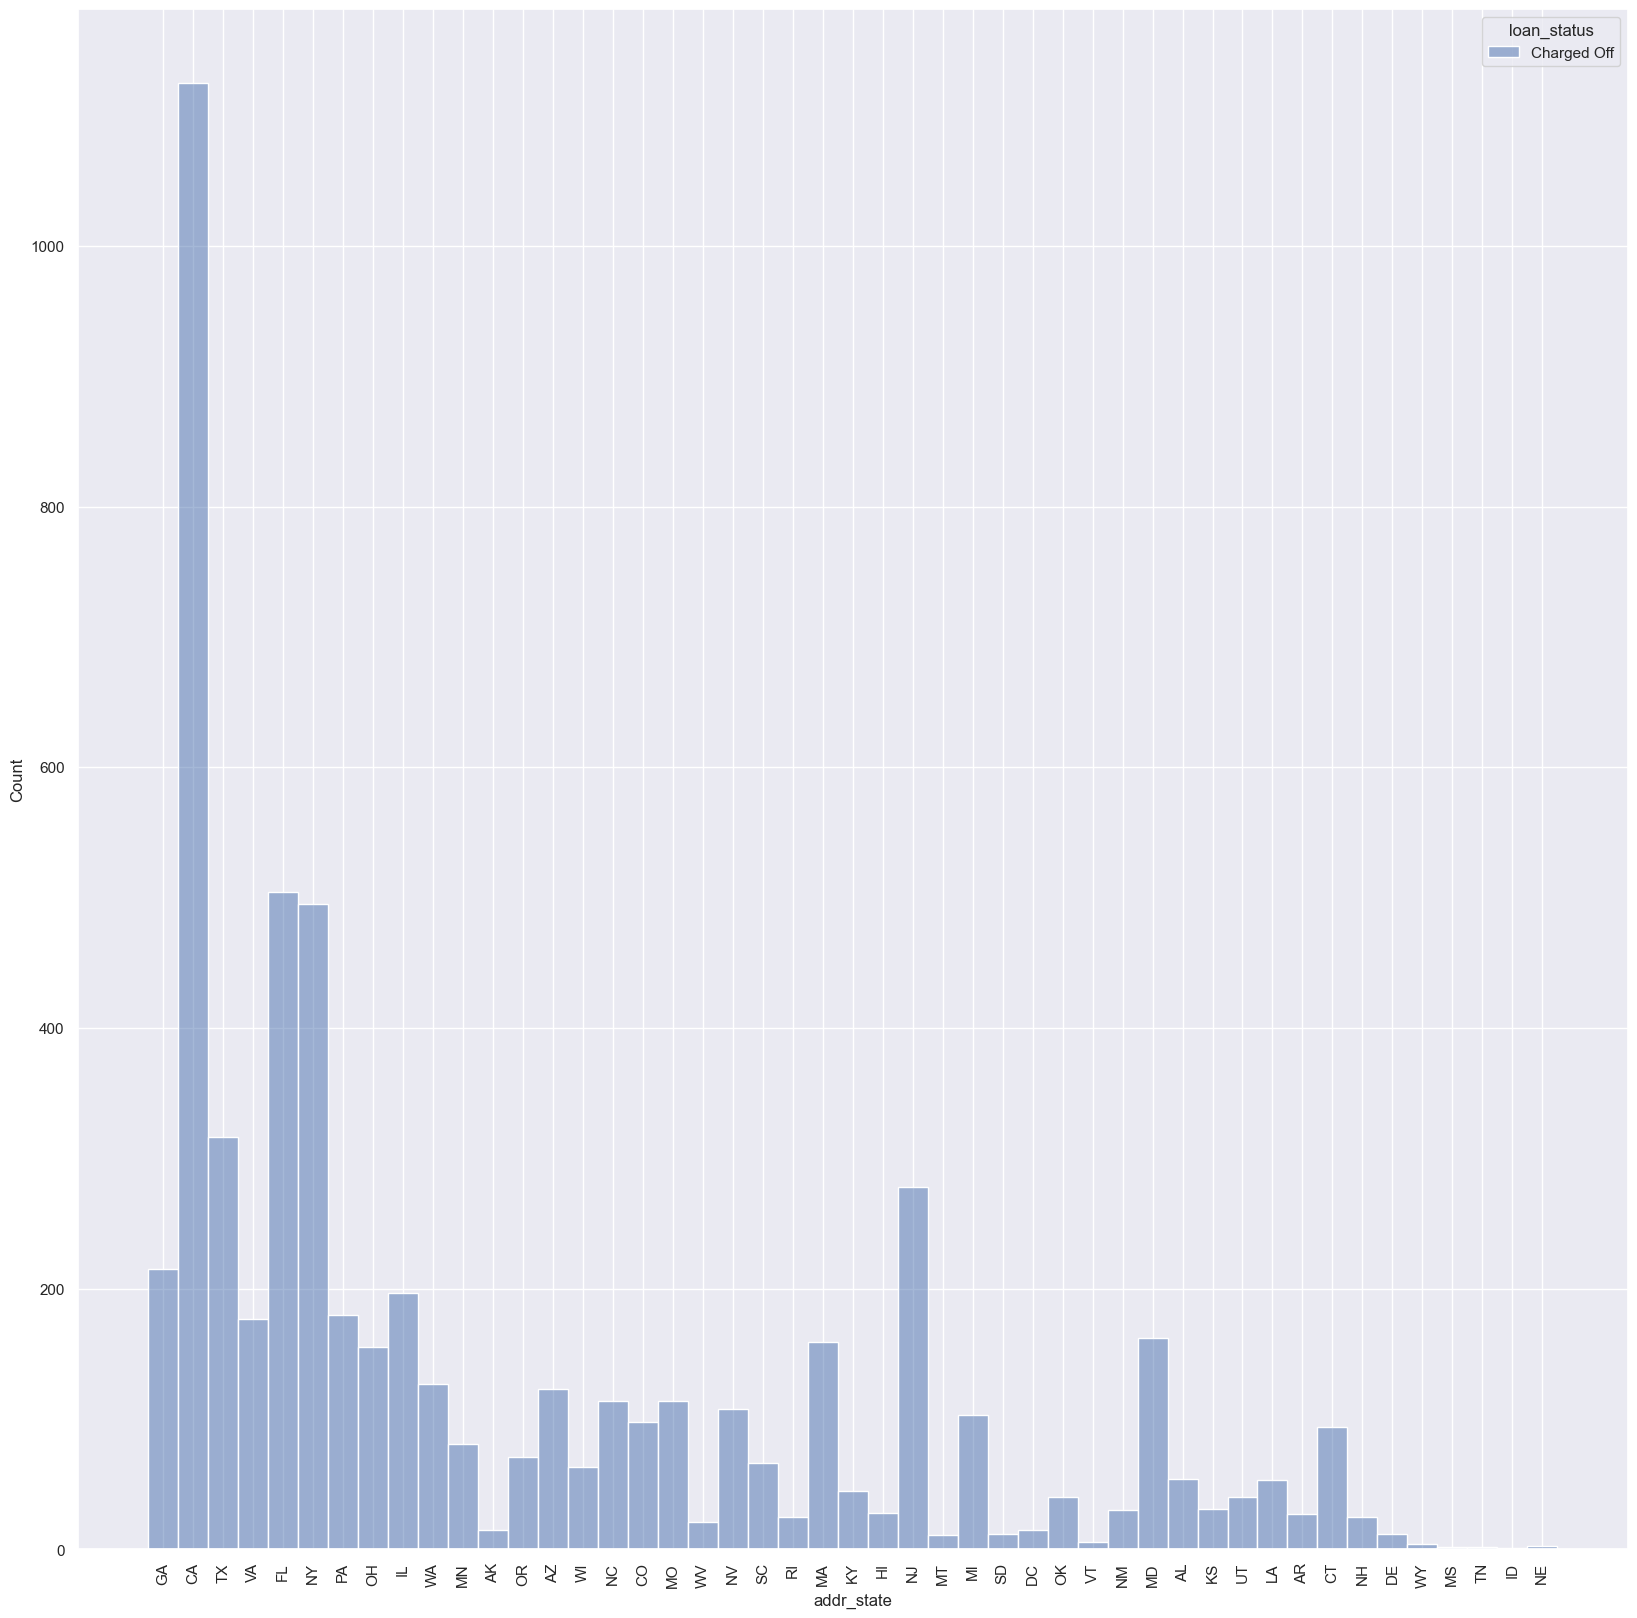

In [38]:
#signle history plot
sns.histplot(loan_defaulter, x="addr_state", hue="loan_status") 
width = 20
height = 20
sns.set(rc = {'figure.figsize':(width, height)})
plt.xticks(rotation=90)
plt.show()

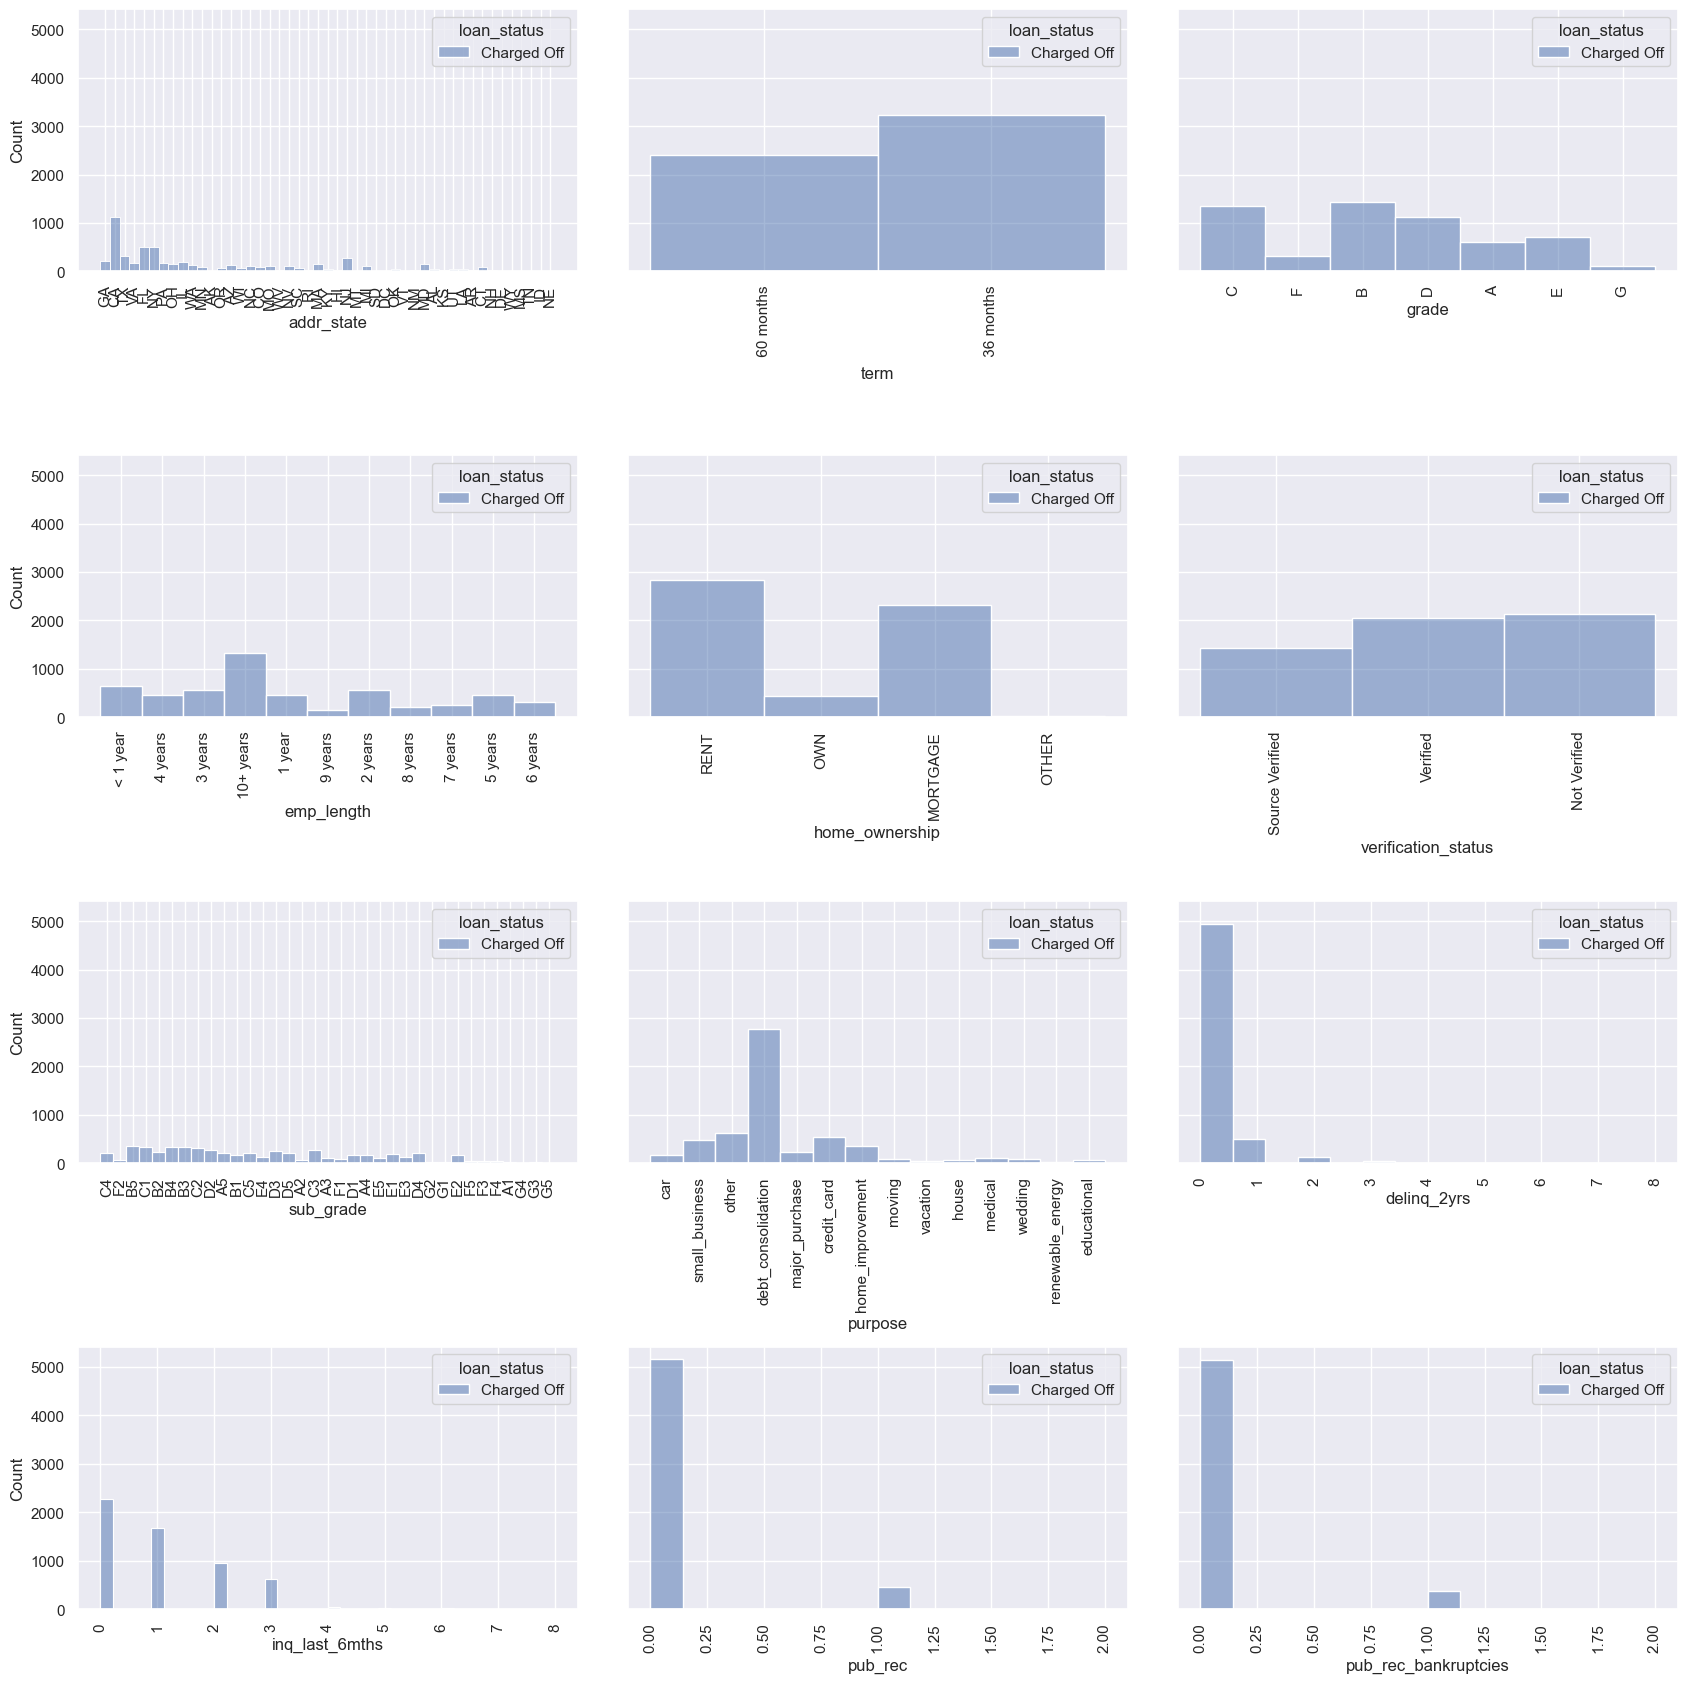

In [39]:
#all the univariate analysis for columns selected in sign plot

fig, axes = plt.subplots(4, 3, sharey=True)

sns.histplot(loan_defaulter, x="addr_state", hue="loan_status", ax=axes[0,0])

sns.histplot(loan_defaulter, x="term", hue="loan_status", ax=axes[0,1])
sns.histplot(loan_defaulter, x="grade", hue="loan_status", ax=axes[0,2])
sns.histplot(loan_defaulter, x="emp_length", hue="loan_status", ax=axes[1,0])
sns.histplot(loan_defaulter, x="home_ownership", hue="loan_status", ax=axes[1,1])
sns.histplot(loan_defaulter, x="verification_status", hue="loan_status", ax=axes[1,2])
sns.histplot(loan_defaulter, x="sub_grade", hue="loan_status", ax=axes[2,0])
sns.histplot(loan_defaulter, x="purpose", hue="loan_status", ax=axes[2,1])
sns.histplot(loan_defaulter, x="delinq_2yrs", hue="loan_status", ax=axes[2,2])
sns.histplot(loan_defaulter, x="inq_last_6mths", hue="loan_status", ax=axes[3,0])
sns.histplot(loan_defaulter, x="pub_rec", hue="loan_status", ax=axes[3,1])
sns.histplot(loan_defaulter, x="pub_rec_bankruptcies", hue="loan_status", ax=axes[3,2])
for x_i in range(4):
    for y_i in range(3):
        for tick in axes[x_i, y_i].get_xticklabels():
            tick.set_rotation(90)
            # axes[x_i, y_i].tick_params(axis='x', which='major', pad=30)
 
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7)
plt.show()

## Bivariate Analysis

In [40]:
#From this Bivariate Analysi, folowing listed columns from Univariate analysis are considered
colm_list = ["addr_state", "term", "grade", "emp_length", "home_ownership", "verification_status", "purpose"] 

In [41]:
#Calculating the crosstab data for the columns selected
bivariant_check_lst = []
count_value = []
for plot_i in range(len(colm_list)):
    for plot_j in range(len(colm_list)):
        if plot_i != plot_j:
            ct_margins = pd.crosstab(loan_defaulter[colm_list[plot_i]], loan_defaulter[colm_list[plot_j]]) #, margins=True)
            bivariant_check_lst.append(ct_margins)
            count_value.append(ct_margins.max().max())
        else:
            bivariant_check_lst.append(0)
            if plot_i != 0:
                count_value.append(min(count_value))
        # sns.heatmap(ct_margins, cmap='coolwarm', annot=False, ax=axes[plot_i,plot_j], vmin=50, vmax=100)
print(count_value)

[690, 292, 256, 724, 418, 548, 690, 256, 985, 701, 1777, 1652, 1469, 292, 985, 256, 318, 710, 618, 638, 256, 701, 318, 256, 753, 615, 704, 724, 1777, 710, 753, 256, 1109, 1421, 418, 1652, 618, 615, 1109, 256, 1142, 548, 1469, 638, 704, 1421, 1142, 256]


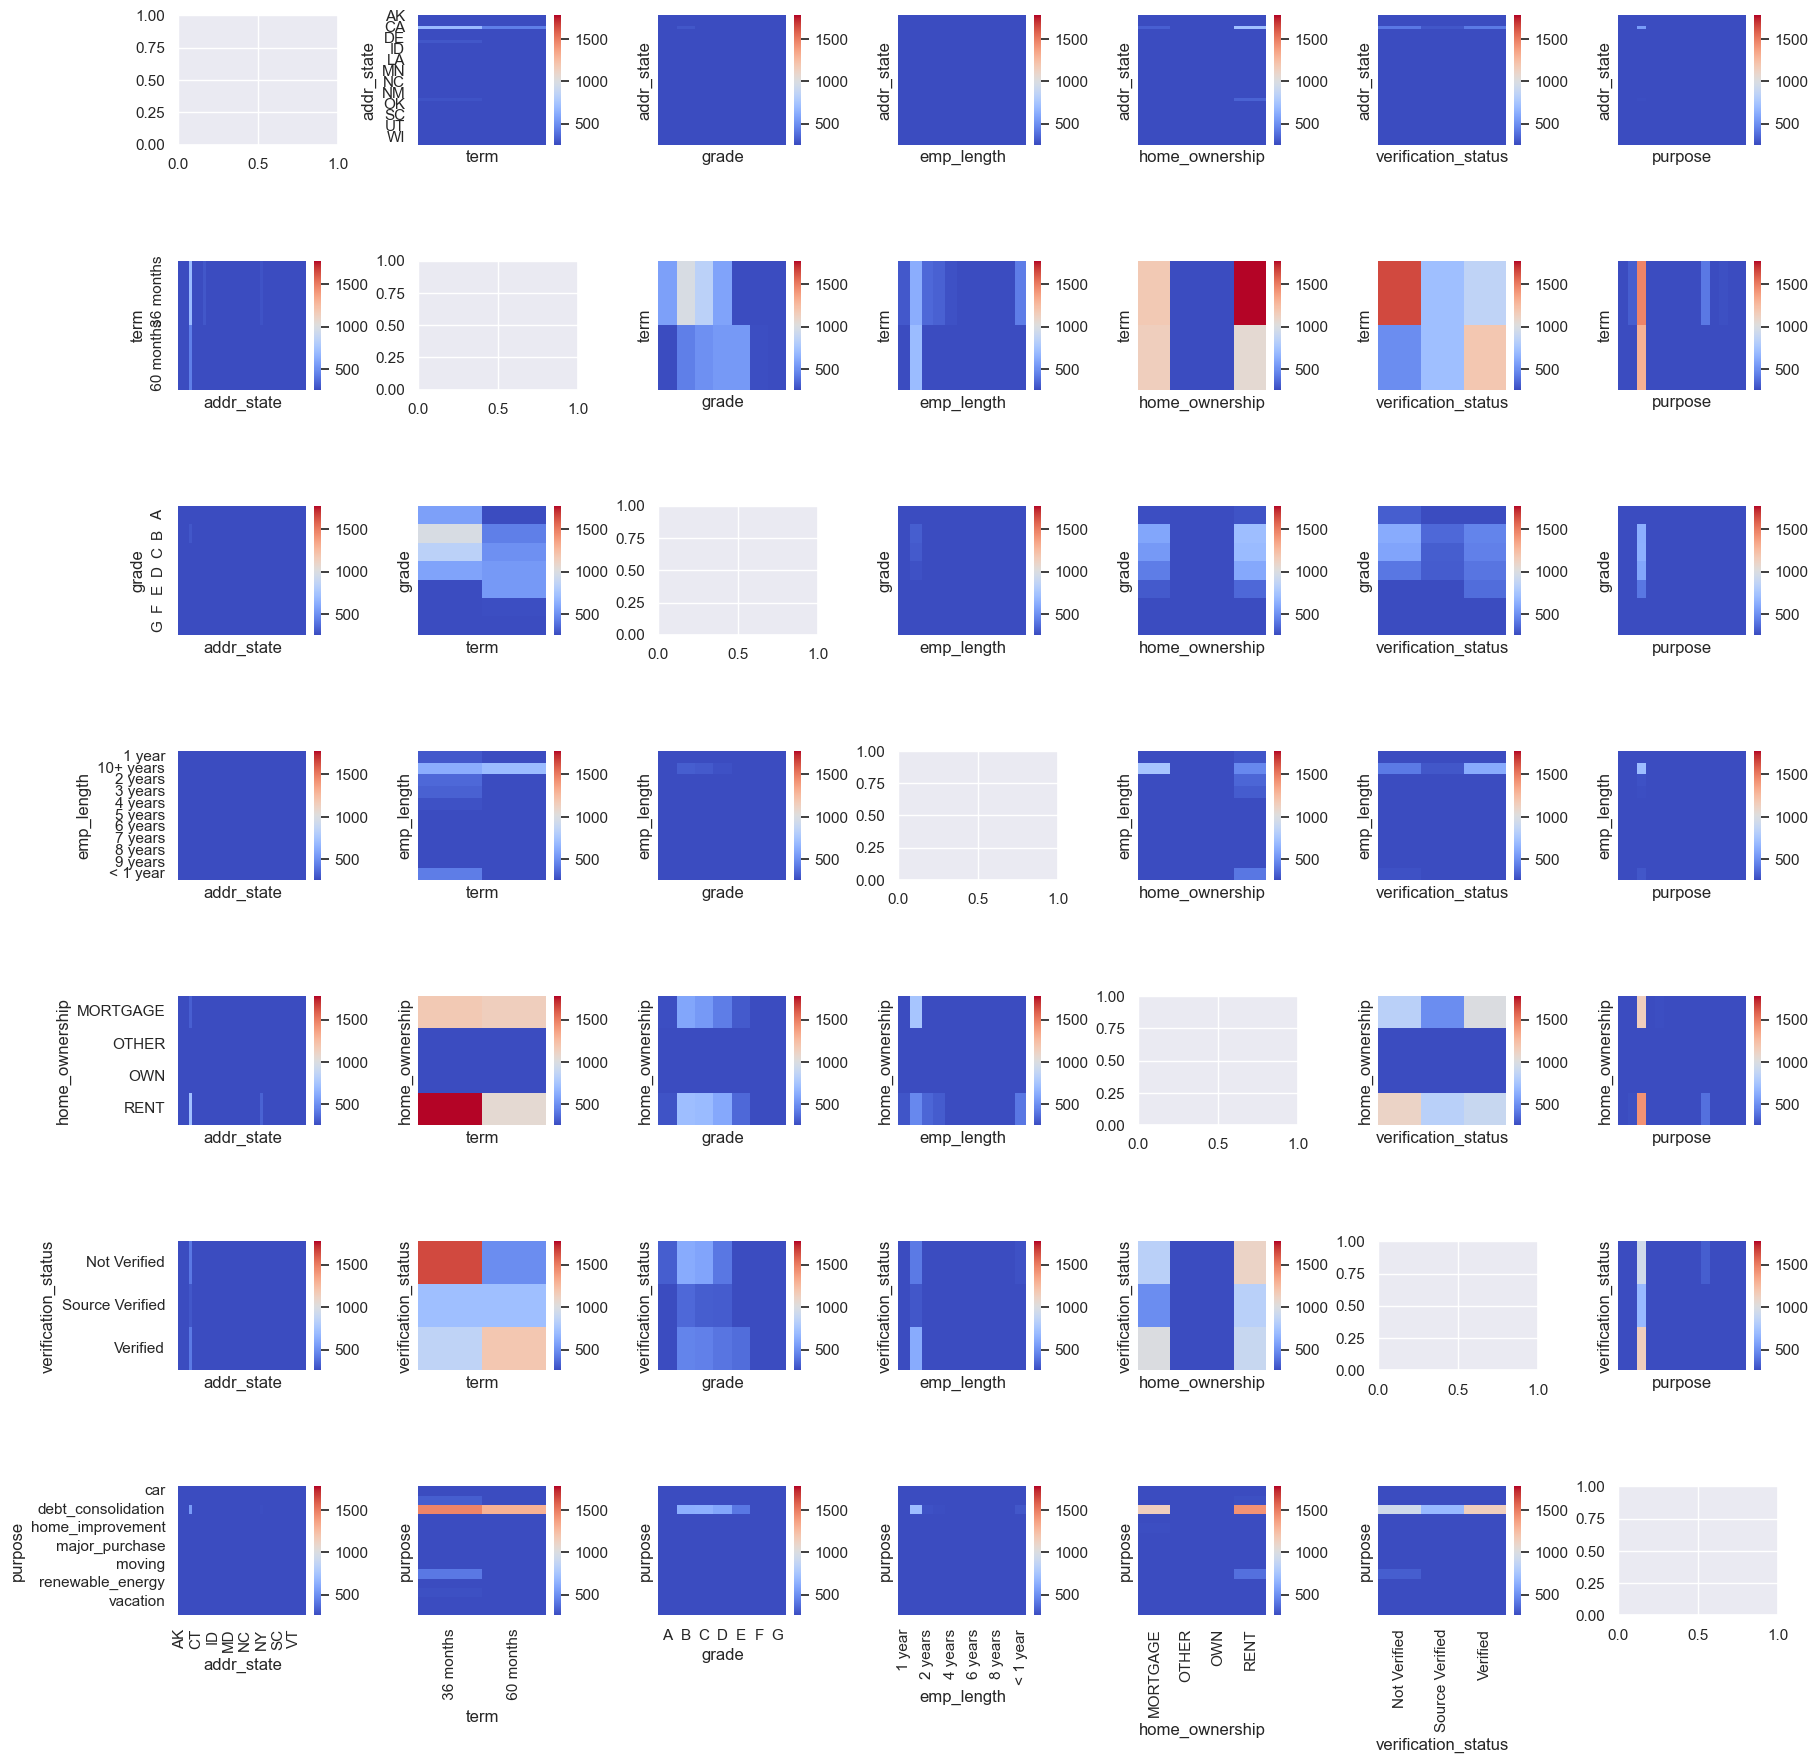

In [42]:
#Using heatmap plot to see the Bivariate anakysis data

cmap_vmax = max(count_value)
cmap_vmin = min(count_value)
fig, axes = plt.subplots(len(colm_list), len(colm_list)) #, sharex=True)
ind_i = 0
for plot_i in range(len(colm_list)):
    for plot_j in range(len(colm_list)):
        if plot_i != plot_j:
            # ct_margins = pd.crosstab(loan_defaulter_only[colm_list[plot_i]], loan_defaulter_only[colm_list[plot_j]]) #, margins=True)
            sns.heatmap(bivariant_check_lst[ind_i], cmap='coolwarm', annot=False, ax=axes[plot_i,plot_j], vmin=cmap_vmin, vmax=cmap_vmax)
            if ind_i%7 == 0:
                if plot_i != len(colm_list)-1:
                    axes[plot_i,plot_j].xaxis.set_tick_params(labelbottom=False)
            elif plot_i == len(colm_list)-1:
                axes[plot_i,plot_j].yaxis.set_tick_params(labelleft=False)
            else:
                if ind_i != 1:
                    axes[plot_i,plot_j].xaxis.set_tick_params(labelbottom=False)
                    axes[plot_i,plot_j].yaxis.set_tick_params(labelleft=False)
                else:
                    axes[plot_i,plot_j].xaxis.set_tick_params(labelbottom=False)
                
        ind_i = ind_i + 1
        # if ind_i == 4:
        #     break

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.9)
plt.show()